In [1]:
import pandas as pd

In [3]:
#load to given file
df = pd.read_excel('board2.xlsx')
df

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


### Problem 1.A.

In [5]:
#filter the rows in line with 'Instrumentation' value of 'Track, 'Luzon' value of 'Hometown and 'Electronincs' values of  greater than 70 then select the columns of 'Name','GEAS','Electronics'
Instru = df.loc[(df['Track']=='Instrumentation')&(df['Hometown']=='Luzon')&(df['Electronics']>70),['Name','GEAS','Electronics']]
Instru

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


In [81]:
#save the file
Instru.to_excel('Instru.xlsx', sheet_name='Sheet1')

### Problem 1.B.

In [7]:
#get the average of the subjects and add 'Average' as new column in order to show 'Average' values on the output
df['Average'] = df[['Math','Electronics','GEAS','Communication']].mean(axis=1)
#filter the rows in line with 'Female' value of 'Gender', 'Mindanao' for the 'Hometown' value and 'Average' values greater or equal than 55 then select the columns of 'Name','Track','Electronics','Average'
Mindy = df[(df['Gender']=='Female')&(df['Hometown']=='Mindanao')&(df['Average']>=55)][['Name','Track','Electronics','Average']]
Mindy

,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


In [77]:
#save the file 
Mindy.to_excel('Mindy.xlsx', sheet_name='Sheet1')

### Problem 2.

In [9]:
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#get the average grade of students for all subjects
df['avg'] = df[['Math','Electronics','GEAS','Communication']].mean(axis=1)
avg

0     75.00
1     67.25
2     72.75
3     70.50
4     69.00
5     75.50
6     58.50
7     61.75
8     47.75
9     67.25
10    54.75
11    76.00
12    62.25
13    80.50
14    59.00
15    77.25
16    70.50
17    63.50
18    73.00
19    66.50
20    68.50
21    62.50
22    68.75
23    57.75
24    75.25
25    65.75
26    60.75
27    67.75
28    63.50
29    68.00
dtype: float64

In [45]:
#get the average for the different features (Gender, Track, Hometown)
subAvg = df.groupby(['Gender','Track','Hometown'])['avg'].mean()
subAvg

Gender  Track             Hometown
Female  Communication     Luzon       77.250000
                          Mindanao    66.875000
                          Visayas     58.625000
        Instrumentation   Luzon       58.500000
                          Mindanao    72.750000
                          Visayas     65.750000
        Microelectronics  Luzon       71.375000
                          Mindanao    64.750000
                          Visayas     67.250000
Male    Communication     Luzon       72.125000
                          Visayas     69.083333
        Instrumentation   Luzon       64.250000
                          Mindanao    63.500000
                          Visayas     70.500000
        Microelectronics  Luzon       73.000000
                          Mindanao    67.250000
                          Visayas     60.750000
Name: avg, dtype: float64

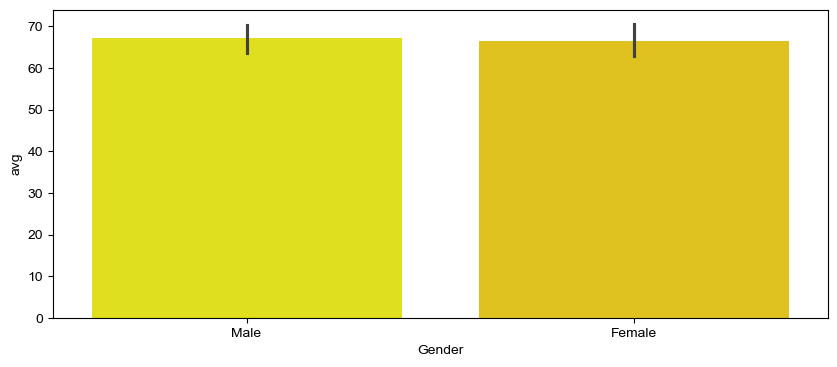

In [41]:
#with the use of matplotlib and seaborn, plot the bar graph of the that will show the contribution of gender in gaining a high average
#declared the colors used 
colors = ['#FFFF00','#FFD700']
#changed the figure's width to 10 and height to 4 for aesthetic purposes
plt.figure(figsize=(10, 4))
#plotted the results using bar plot 
sns.barplot(x='Gender', y='avg', data=df, hue='Gender', palette=colors)
#added a white grid background for better visualization of the results
sns.set(style="whitegrid")
#display the plot 
plt.show()

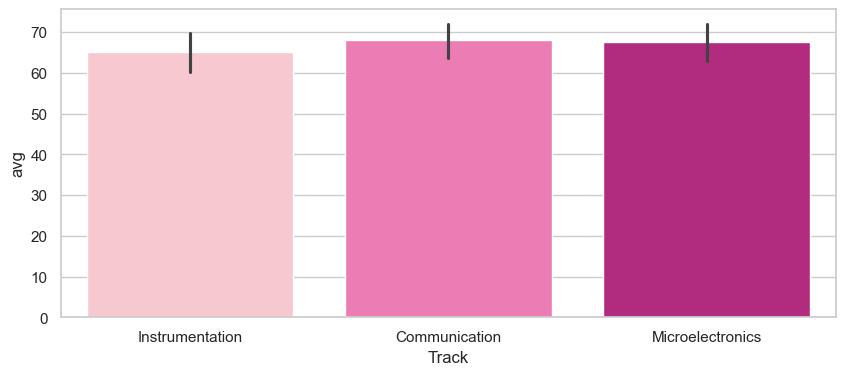

In [43]:
#with the use of matplotlib and seaborn, plot the bar graph of the that will show the contribution of track in college in gaining a high average
#declared the colors used 
colors = ['#FFC0CB','#FF69B4','#C71585']
#changed the figure's width to 10 and height to 4 for aesthetic purposes
plt.figure(figsize=(10, 4))
#plotted the results using bar plot 
sns.barplot(x='Track', y='avg', data=df, hue='Track', palette=colors)
#added a white grid background for better visualization of the results
sns.set(style="whitegrid")
#display the plot 
plt.show()

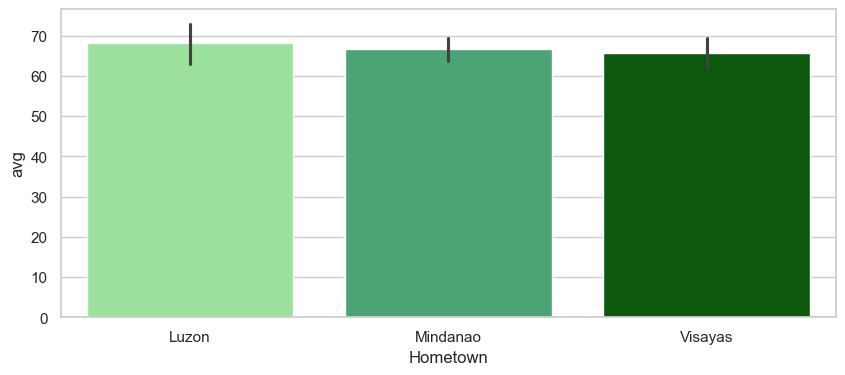

In [47]:
#with the use of mathplotlib and seaborn, plot the bar graph of the that will show the contribution of hometown in gaining a high average
#declared the colors used 
colors = ['#90EE90','#3CB371','#006400']
#changed the figure's width to 10 and height to 4 for aesthetic purposes
plt.figure(figsize=(10, 4))
#plotted the results using bar plot 
sns.barplot(x='Hometown', y='avg', data=df, hue='Hometown', palette=colors)
#added a white grid background for better visualization of the results
sns.set(style="whitegrid")
#display the plot 
plt.show()